In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
city_data = pd.read_csv('city_data.csv')
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
ride_data = pd.read_csv('ride_data.csv')
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [8]:
df = city_data.merge(ride_data.groupby(['city']).mean()['fare'], on=['city'])
df = df.merge(ride_data.groupby(['city']).count()['ride_id'], on=['city'])
df_new = df[['city', 'fare', 'driver_count', "ride_id"]]
df_new.columns = ['city', 'average fare', 'number of drivers', 'number of rides']
df_new = df_new.sort_values('city')
df_new.head()

,city,average fare,number of drivers,number of rides
61,Amandaburgh,24.641667,12,18
9,Barajasview,25.332273,26,22
90,Barronchester,36.422500,11,16
88,Bethanyland,32.956111,22,18
115,Bradshawfurt,40.064000,7,10


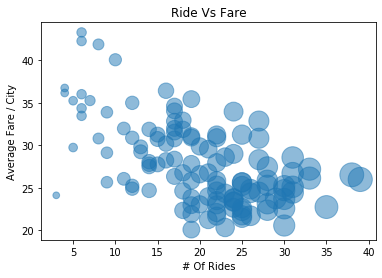

In [10]:
plt.scatter(df_new['number of rides'], df_new['average fare'],alpha=0.5,s=15*df_new['number of rides'])
plt.xlabel('# Of Rides')
plt.ylabel('Average Fare / City')
plt.title('Ride Vs Fare')
plt.show()

([<matplotlib.patches.Wedge at 0x7f3f7de07a58>,
 [Text(1.0849974335199486, 0.1810540506454493, 'Rural'),
  Text(0.4418649348526167, 1.0073506734735889, 'Suburban'),
  Text(-0.6563376882639044, -1.0045998402171852, 'Urban')],
 [Text(0.5918167819199719, 0.09875675489751778, '5.3%'),
  Text(0.24101723719233634, 0.5494640037128666, '26.3%'),
  Text(-0.3828636514872775, -0.5860165734600246, '68.4%')])

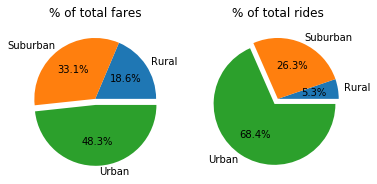

In [11]:
df_new2 = df.groupby('type').sum()
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].set_title('% of total fares')
axes[0].pie(df_new2['fare'], labels=df_new2.index, explode = (0, 0, 0.1), autopct='%1.1f%%')
axes[1].set_title('% of total rides')
axes[1].pie(df_new2['ride_id'], labels=df_new2.index, explode = (0, 0, 0.1), autopct='%1.1f%%')

In [13]:
import seaborn as sns
sns.set()

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


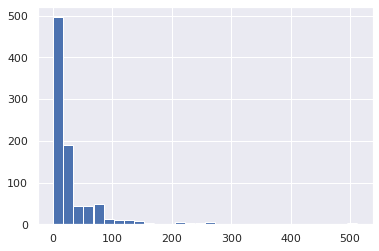

In [14]:
titanic['fare'].hist(bins=30)

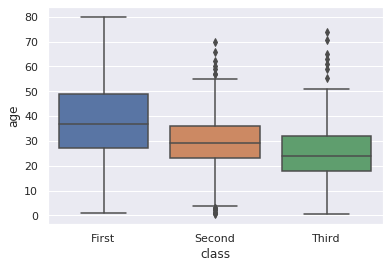

In [17]:
sns.boxplot(x='class', y='age', data=titanic)

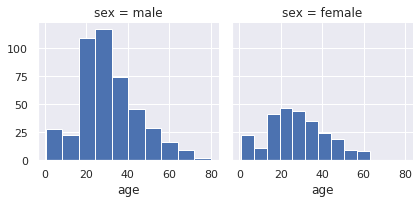

In [18]:
g = sns.FacetGrid(titanic, col="sex")
g.map(plt.hist, "age");

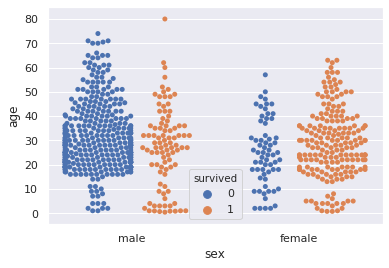

In [19]:
sns.swarmplot(x="sex", y="age", hue='survived',data=titanic, dodge=True)

In [21]:
wine_data = pd.read_csv('wine.data.csv')
wine_data.head()

,Label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
wine_label = wine_data['Label']
wine_data = wine_data.drop('Label', axis=1)

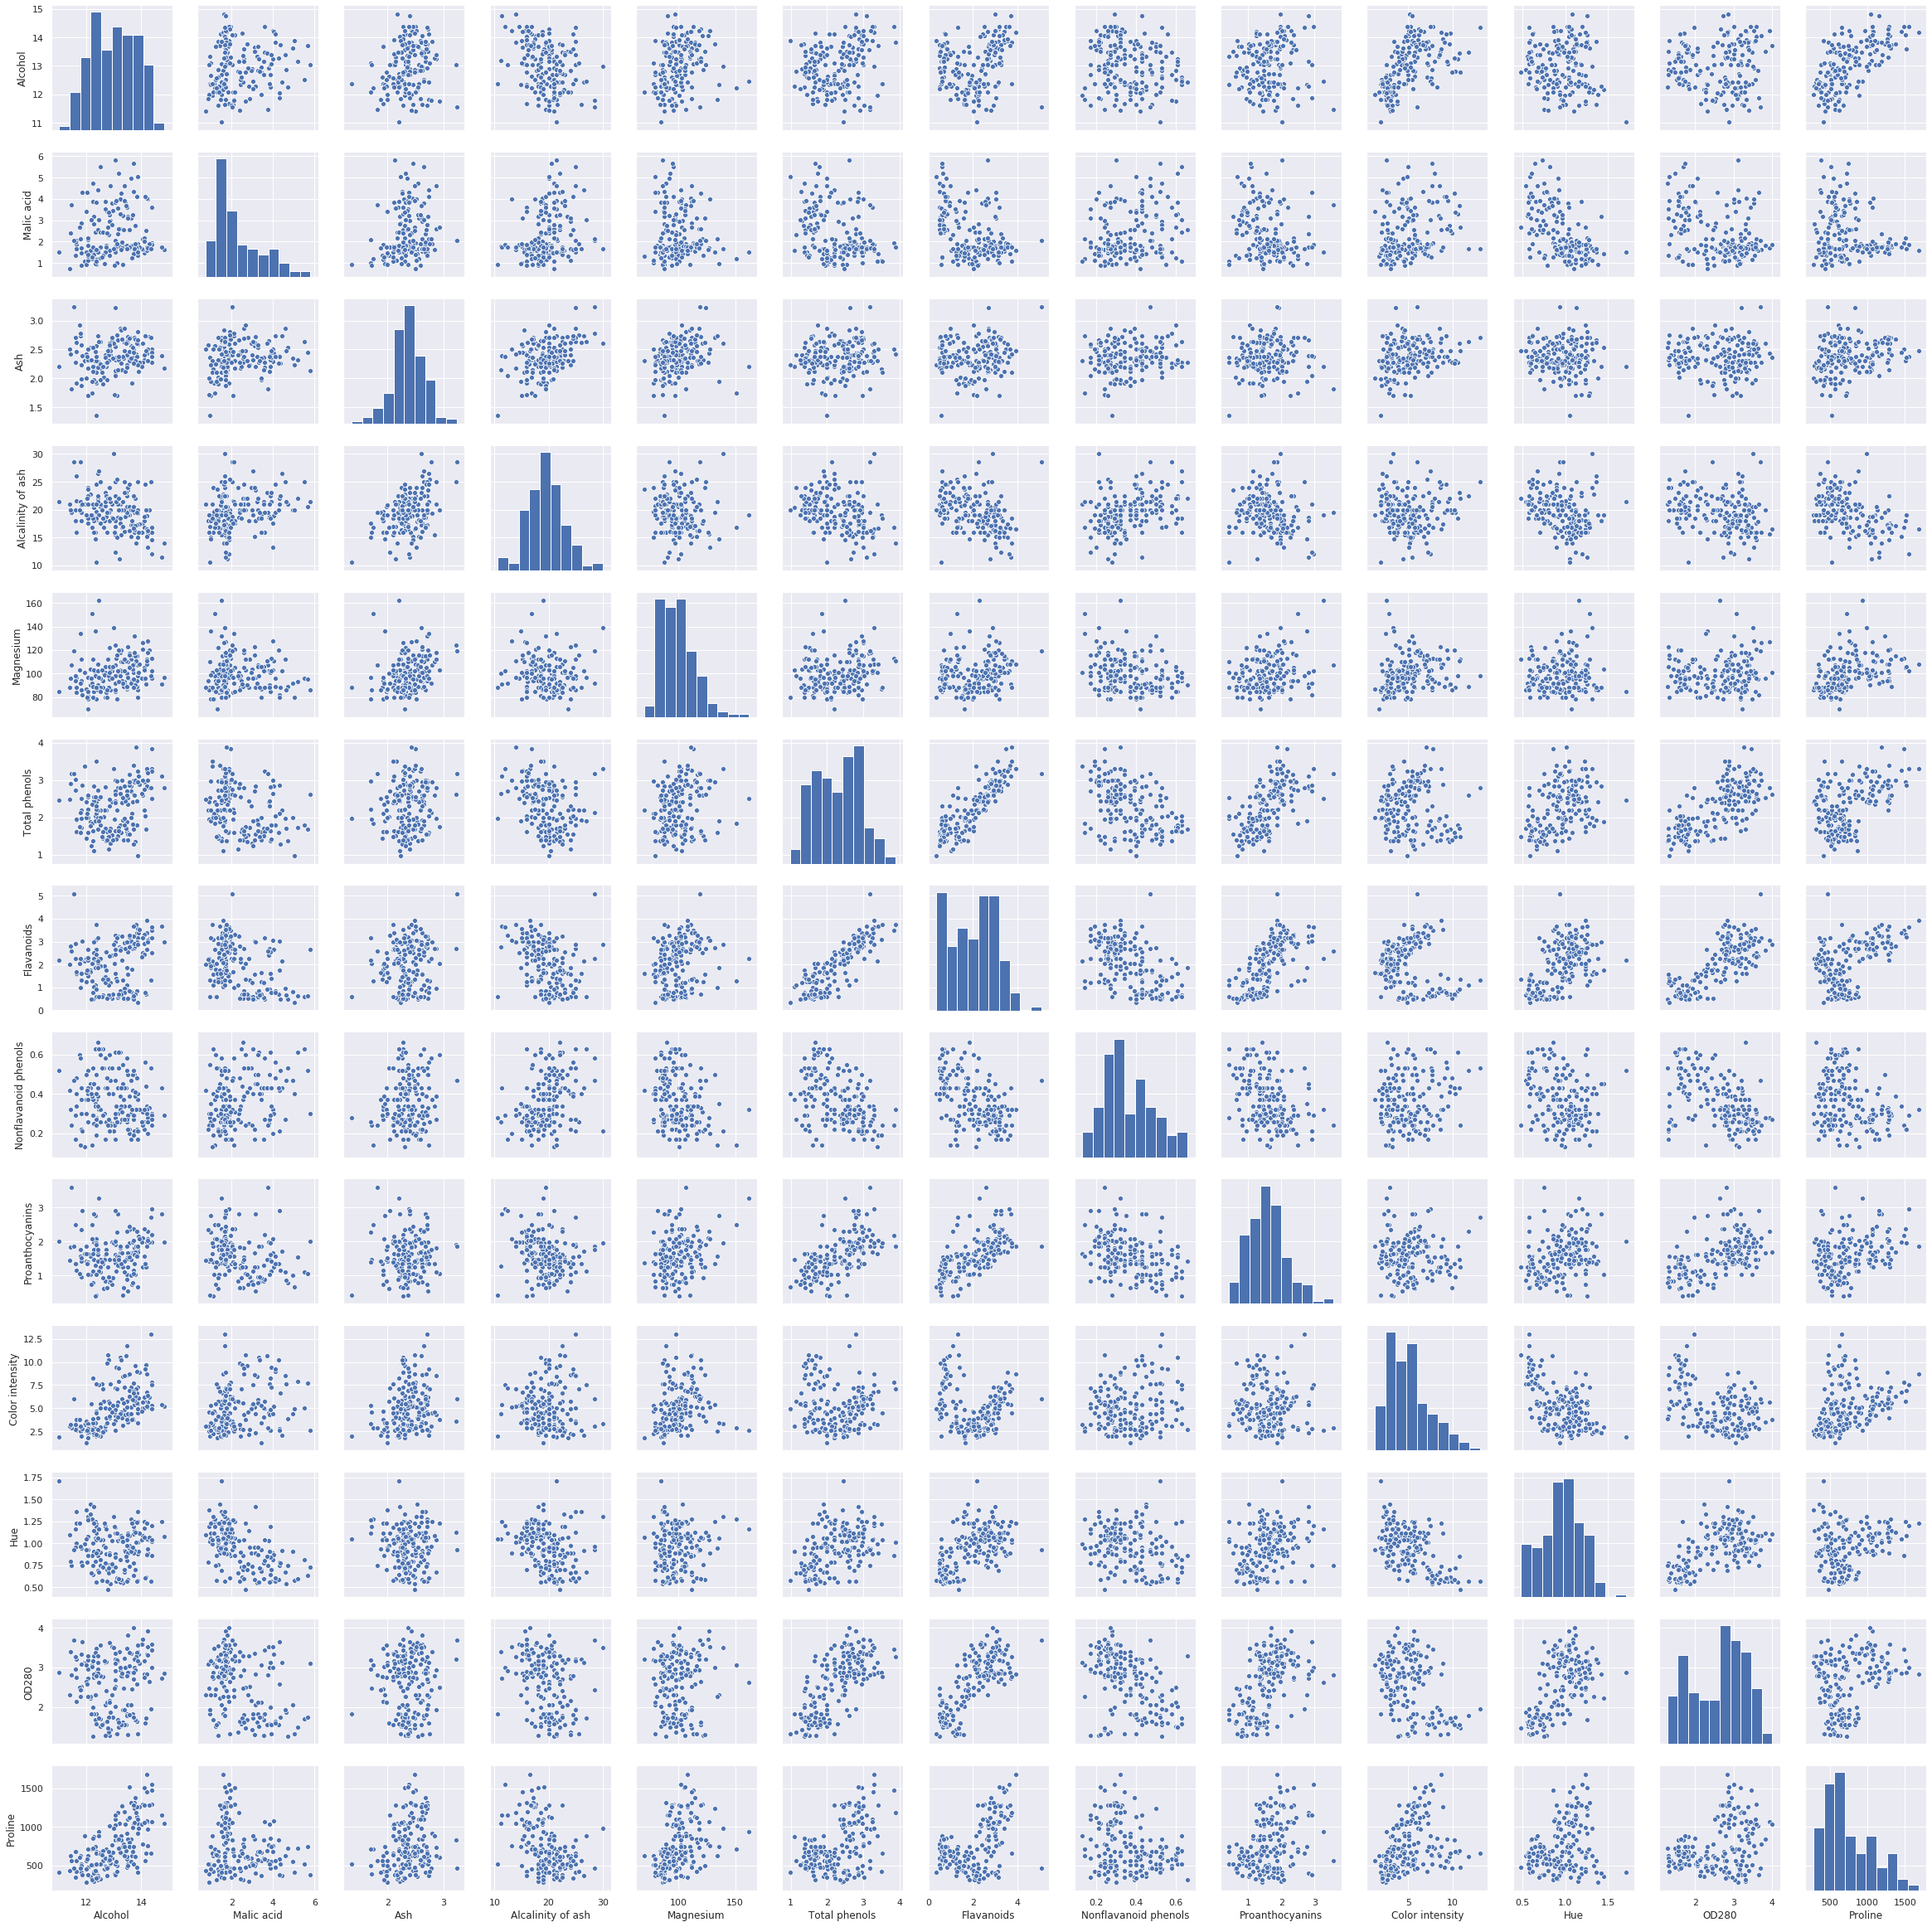

In [23]:
sns.pairplot(wine_data)

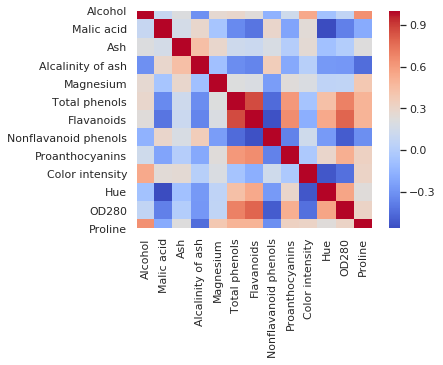

In [24]:
cm = wine_data.corr()
sns.heatmap(cm, square=True, cmap='coolwarm')

In [25]:
from sklearn import preprocessing

standardScaler = preprocessing.StandardScaler()
standardScaler.fit(wine_data)
X_scaled_array = standardScaler.transform(wine_data)
normalizedData = pd.DataFrame(X_scaled_array, columns = wine_data.columns)
normalizedData

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


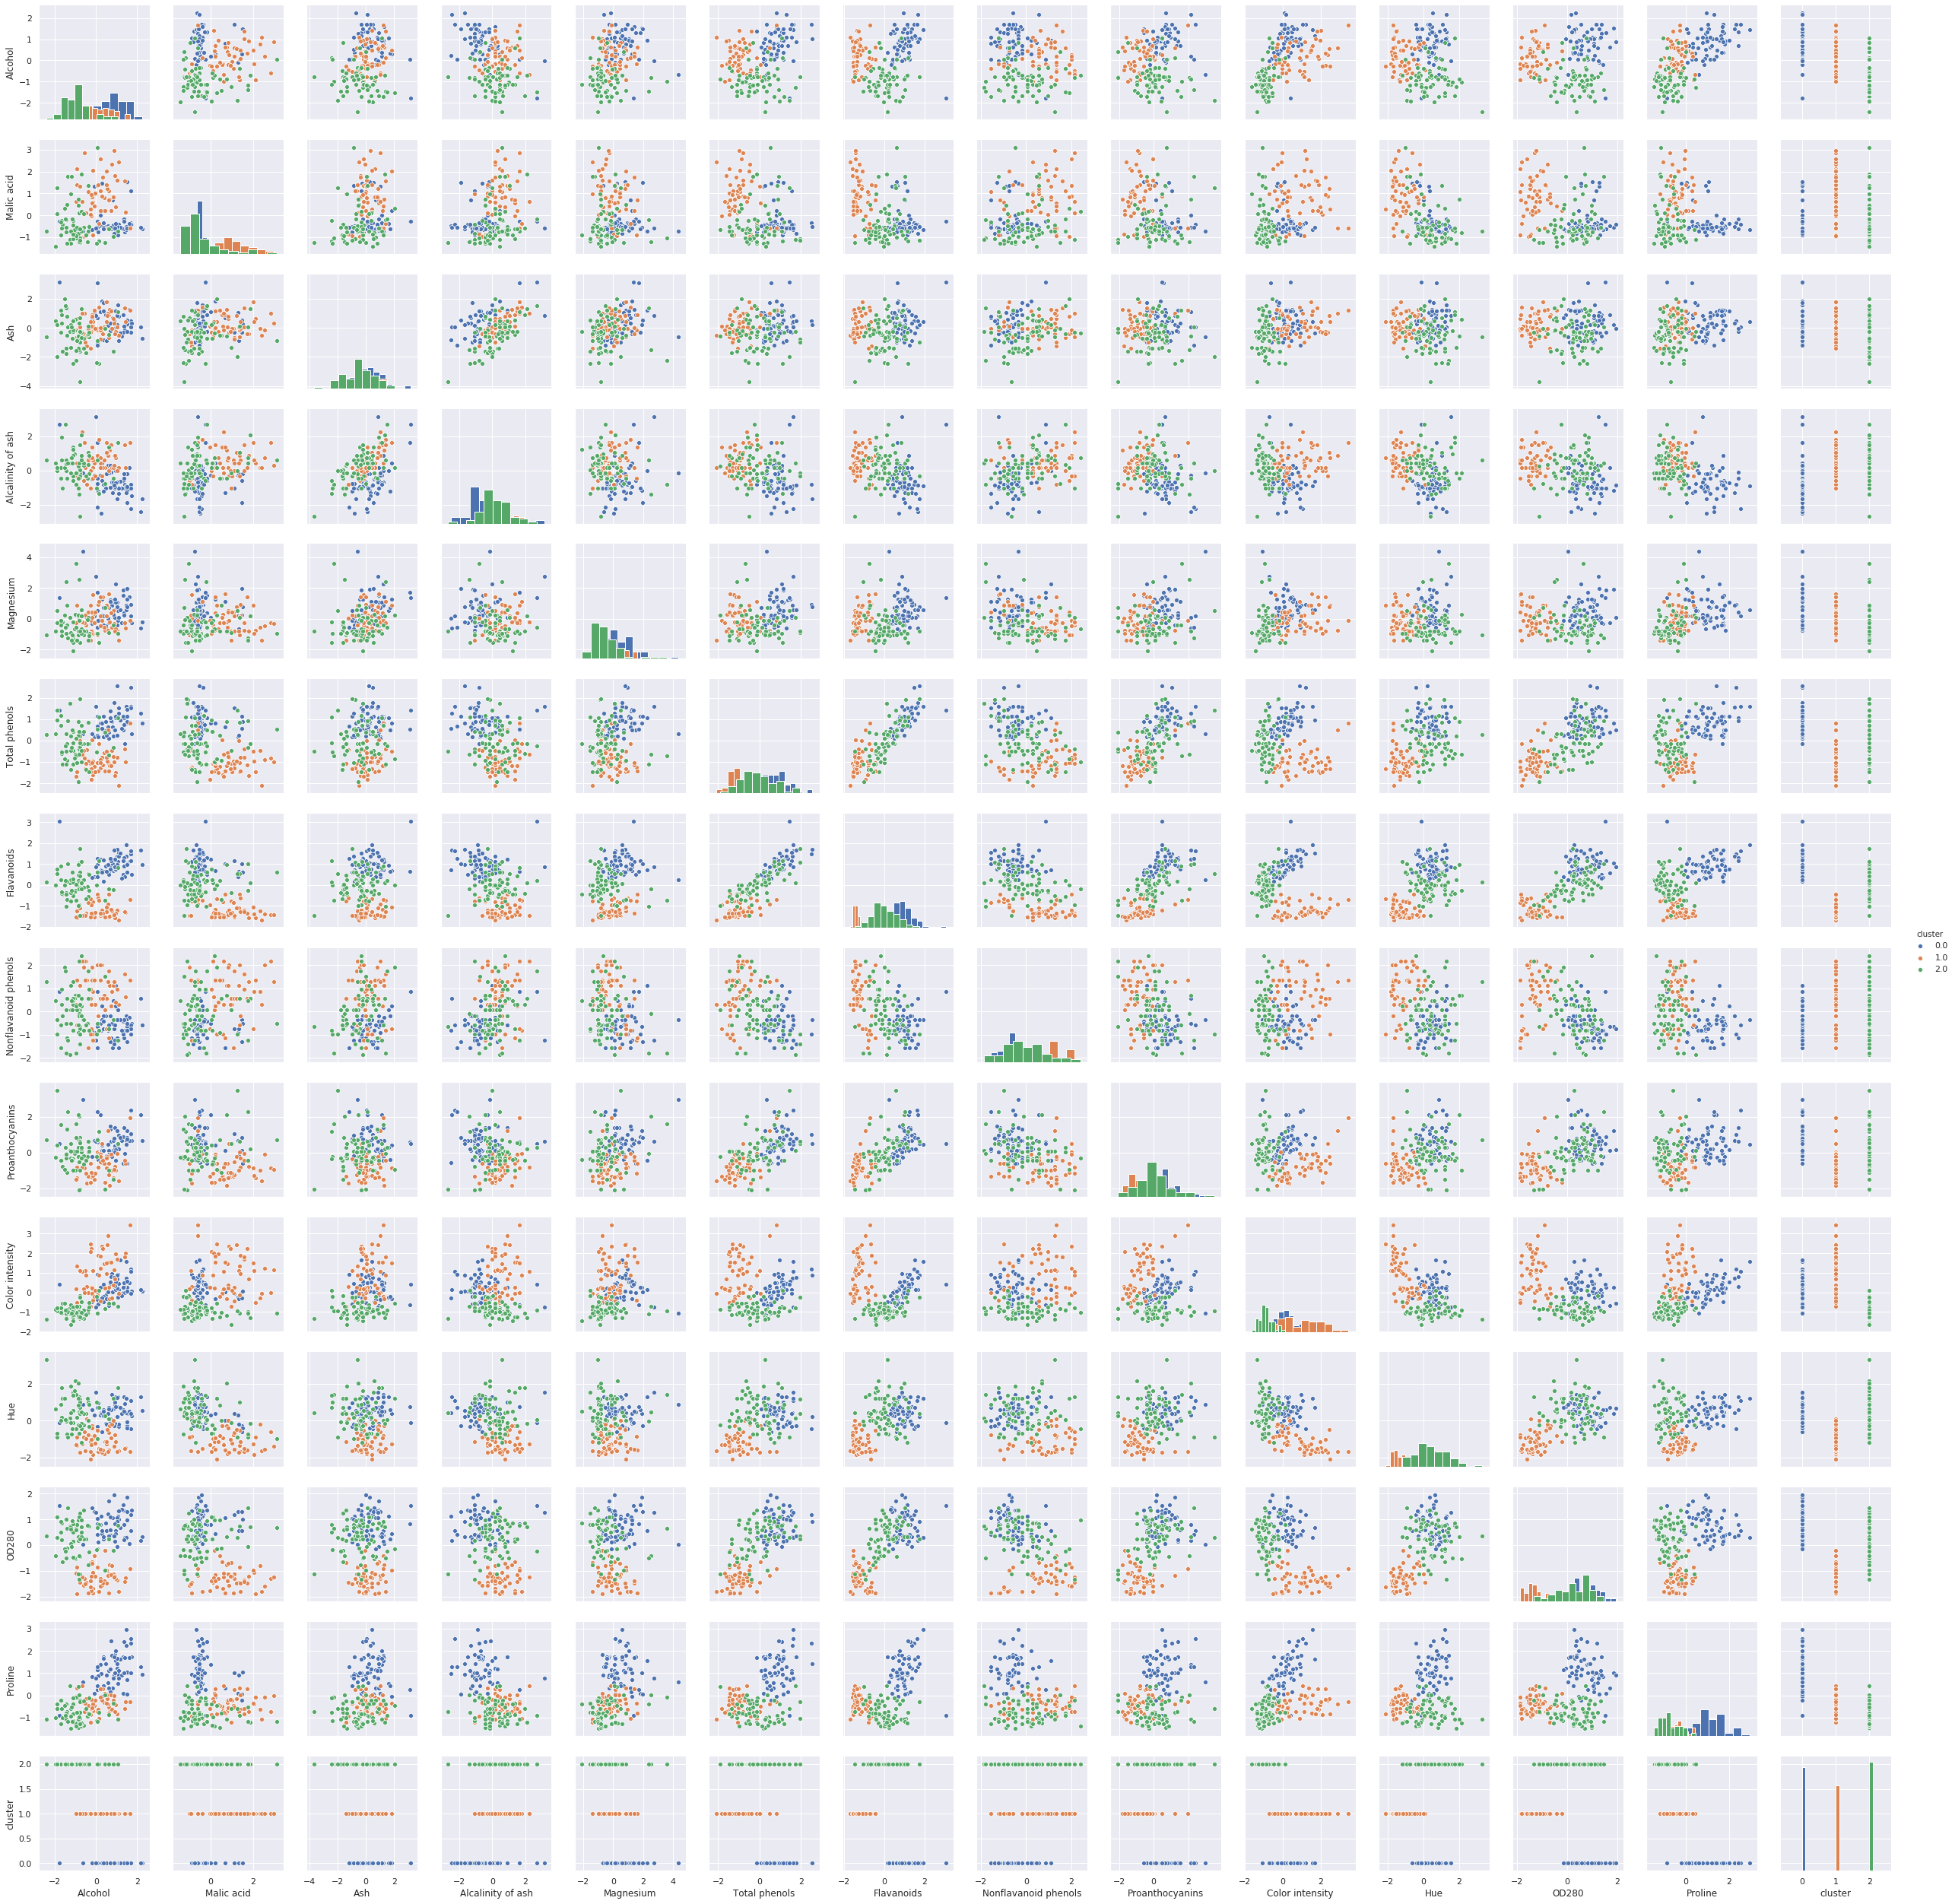

In [26]:
from sklearn.cluster import KMeans
import random 
  
seed = random.seed() 
kMeansClustering = KMeans(n_clusters = 3, random_state=seed)
res = kMeansClustering.fit_predict(normalizedData)
normalizedData["cluster"] = res.astype('float64')
sns_plot = sns.pairplot(normalizedData, hue = "cluster",diag_kind="hist")

In [27]:
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(wine_label, res)

0.8974949815093207